In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import os
import ydf

base_path = "/kaggle/input/house-prices-advanced-regression-techniques/"

plt.style.use("ggplot")
pd.set_option('display.max_columns', 200)

In [67]:
df_train = pd.read_csv(base_path + "train.csv", index_col="Id")
df_test = pd.read_csv(base_path + "test.csv", index_col="Id")

In [68]:
#Subseetting dataset

df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

#dropping null columns + adding y train
y_train = df_train['SalePrice']
df_train = df_train[[
        'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
                     #'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea',
        # 'PoolQC', 'Fence', 'MiscFeature', 
        'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']].copy()

df_test = df_test[[
        'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
                     #'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea',
        # 'PoolQC', 'Fence', 'MiscFeature', 
        'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']].copy()

#seperate into groups of cols
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [69]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer()
X_num = pd.DataFrame(num_imputer.fit_transform(df_train[quantitative]), columns=quantitative)

cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat = pd.DataFrame(cat_imputer.fit_transform(df_train[qualitative]), columns=qualitative)

#X_cat = df_train[qualitative]
X_train = pd.concat([X_num, X_cat], axis=1)

num_imputer = SimpleImputer()
X_test_num = pd.DataFrame(num_imputer.fit_transform(df_test[quantitative]), columns=quantitative)

cat_imputer = SimpleImputer(strategy='most_frequent')
X_test_cat = pd.DataFrame(cat_imputer.fit_transform(df_test[qualitative]), columns=qualitative)

#X_cat = df_train[qualitative]
X_train = pd.concat([X_num, X_cat], axis=1)
X_test = pd.concat([X_test_cat, X_test_num], axis=1)

In [70]:
all_data = pd.concat([X_train, X_test], axis=0)

all_data_encoded = pd.get_dummies(all_data)

X_train = all_data_encoded.iloc[:len(X_train), :].copy()
X_test = all_data_encoded.iloc[len(X_train):, :].copy()

## EDA
Anaylzed data using sns heatmaps and pair plots

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


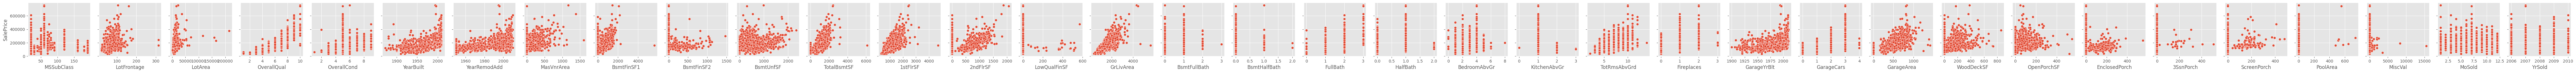

In [33]:
# sns.pairplot(df_train, x_vars=quantitative, y_vars=['SalePrice'])

In [36]:
df_corr = df_train[quantitative].dropna().corr()

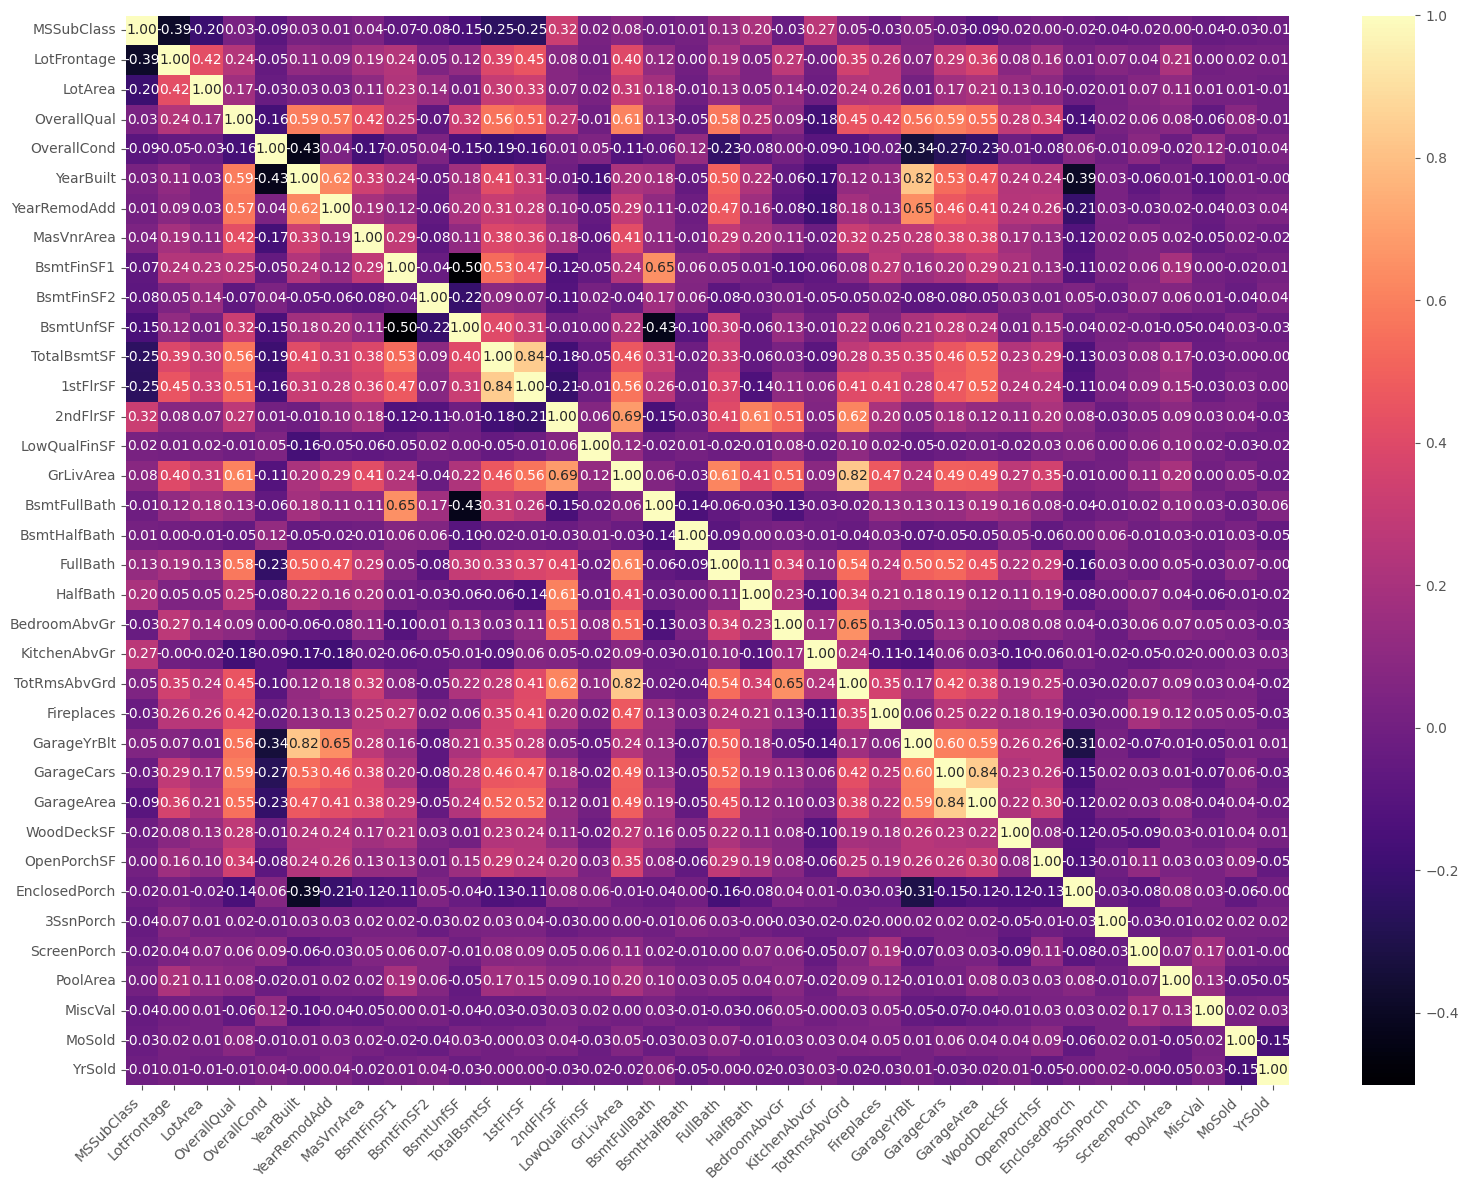

In [40]:
plt.figure(figsize=(16, 12))  #
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="magma")  
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()  
#plt.show()

In [24]:
# For checking purposes only
# missing = X_train.isna().sum()
# missing[missing > 0]

Series([], dtype: int64)

## XGBoost 

In [73]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

# params = {
#     'objective': 'reg:squarederror',  
#     'eval_metric': 'rmse',          
#     'max_depth': 3,                  
#     'learning_rate': 0.1,            
#     'subsample': 0.8,                
#     'colsample_bytree': 0.8          
# }

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 5,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 5,
    'gamma': 0.1,
    'reg_alpha': 1,
    'reg_lambda': 10
}

xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values)


bst = xgb.train(params, xgtrain, num_boost_round=20)

model = xgb.train(
    params=params,
    dtrain=xgtrain,
    num_boost_round=100,             
    evals=[(xgtrain, 'train')], 
    verbose_eval=10                  
)

y_pred = bst.predict(xgtest)

# kf = KFold(n_splits=2)
# for train_index, test_index in kf.split(X_train, y_train):
#     xgb_model = xgb.XGBRFRegressor(random_state=42).fit(
#     X_train[train_index], y_train[train_index])

[0]	train-rmse:76745.60050
[10]	train-rmse:56118.72249
[20]	train-rmse:43259.59750
[30]	train-rmse:34992.87592
[40]	train-rmse:29535.05368
[50]	train-rmse:25785.28255
[60]	train-rmse:23138.46985
[70]	train-rmse:21142.03621
[80]	train-rmse:19599.71193
[90]	train-rmse:18500.65110
[99]	train-rmse:17705.96086


In [74]:
model_xgb = xgb.XGBRegressor(n_estimators=2200)


n_folds = 5

def rmsle(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

model_xgb.fit(X_train, y_train)
xgb_train_pred = model_xgb.predict(X_train)
xgb_pred = model_xgb.predict(X_test)
print(rmsle(y_train, xgb_train_pred))

0.04339171014472733


## YDF GB Trees

In [38]:
X_train = X_train.loc[:, ~X_train.columns.duplicated()]

X_train["Age"] = X_train["YrSold"] - X_train["YearBuilt"]
X_train["TotalSF"] = X_train["TotalBsmtSF"] + X_train["1stFlrSF"] + X_train["2ndFlrSF"]

X_test["Age"] = X_test["YrSold"] - X_test["YearBuilt"]
X_test["TotalSF"] = X_test["TotalBsmtSF"] + X_test["1stFlrSF"] + X_test["2ndFlrSF"]

In [47]:
X_train = pd.concat([X_train, y_train], axis=1)
X_train = X_train.dropna(subset=["SalePrice"])

# model = ydf.GradientBoostedTreesLearner(label="SalePrice", task=ydf.Task.REGRESSION).train(X_train)
model = ydf.GradientBoostedTreesLearner(
    label="SalePrice",
    task=ydf.Task.REGRESSION,
    num_trees=500,
    max_depth=8,
    subsample=0.8,
    l2_regularization=1.0,
    shrinkage = 0.05,
    categorical_algorithm="RANDOM",
    growing_strategy="BEST_FIRST_GLOBAL",
    min_examples=10
).train(X_train)


model.describe()
y_pred = model.predict(X_test)

model.save("/tmp/my_model")

Train model on 1460 examples
Model trained in 0:00:01.220051


In [75]:
#finish it up

sample_submission_df = pd.read_csv(base_path + 'sample_submission.csv')
sample_submission_df['SalePrice'] = y_pred
sample_submission_df.to_csv('/kaggle/working/submissionv7.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,141686.046875
1,1462,164856.546875
2,1463,176715.656250
3,1464,181864.390625
4,1465,186458.265625


In [32]:
tree = model.get_tree(tree_idx=0)

print(tree.pretty(model.data_spec()))

'FireplaceQu' in ['Gd', 'TA', 'Fa', 'Ex'] [score=6.7097e+07 missing=False]
    ├─(pos)─ 'LotArea' >= 11848.5 [score=4.9505e+07 missing=False]
    │        ├─(pos)─ '1stFlrSF' >= 862.5 [score=1.2756e+08 missing=True]
    │        │        ├─(pos)─ '1stFlrSF' >= 1162 [score=1.5656e+08 missing=True]
    │        │        │        ├─(pos)─ 'Condition1' in ['Norm', 'PosN', 'RRAe', 'PosA'] [score=1.3458e+08 missing=False]
    │        │        │        │        ├─(pos)─ value=-783.57 sd=59864
    │        │        │        │        └─(neg)─ value=-2842.6 sd=15742
    │        │        │        └─(neg)─ 'Neighborhood' in ['NAmes', 'CollgCr', 'Somerst', 'Gilbert', 'NridgHt', 'NWAmes', 'BrkSide', 'Mitchel', 'Timber', 'IDOTRR'] [score=8.0015e+08 missing=False]
    │        │        │                 ├─(pos)─ 'Foundation' in ['<OOD>', 'CBlock'] [score=7.1783e+08 missing=True]
    │        │        │                 │    ...
    │        │        │                 └─(neg)─ value=-1395 sd=42594
   